In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import animalhelper

%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
df_out = pd.read_csv('data/aac_outcomes.csv')

In [5]:
df_in = pd.read_csv('data/aac_intakes.csv')

In [6]:
df_out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80681 entries, 0 to 80680
Data columns (total 12 columns):
age_upon_outcome    80673 non-null object
animal_id           80681 non-null object
animal_type         80681 non-null object
breed               80681 non-null object
color               80681 non-null object
date_of_birth       80681 non-null object
datetime            80681 non-null object
monthyear           80681 non-null object
name                56116 non-null object
outcome_subtype     36893 non-null object
outcome_type        80667 non-null object
sex_upon_outcome    80679 non-null object
dtypes: object(12)
memory usage: 7.4+ MB


In [7]:
df_in.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80187 entries, 0 to 80186
Data columns (total 12 columns):
age_upon_intake     80187 non-null object
animal_id           80187 non-null object
animal_type         80187 non-null object
breed               80187 non-null object
color               80187 non-null object
datetime            80187 non-null object
datetime2           80187 non-null object
found_location      80187 non-null object
intake_condition    80187 non-null object
intake_type         80187 non-null object
name                55603 non-null object
sex_upon_intake     80186 non-null object
dtypes: object(12)
memory usage: 7.3+ MB


In [8]:
df = df_in.merge(df_out, on='animal_id', suffixes=('_in', '_out'))

In [9]:
df.columns.values

array(['age_upon_intake', 'animal_id', 'animal_type_in', 'breed_in',
       'color_in', 'datetime_in', 'datetime2', 'found_location',
       'intake_condition', 'intake_type', 'name_in', 'sex_upon_intake',
       'age_upon_outcome', 'animal_type_out', 'breed_out', 'color_out',
       'date_of_birth', 'datetime_out', 'monthyear', 'name_out',
       'outcome_subtype', 'outcome_type', 'sex_upon_outcome'],
      dtype=object)

## Drop columns that will stay the same across out and in

In [10]:
df = df.drop(labels=['animal_type_in', 'breed_in', 'color_in', 'datetime2', 'name_in'], axis=1)

In [11]:
df.columns.values

array(['age_upon_intake', 'animal_id', 'datetime_in', 'found_location',
       'intake_condition', 'intake_type', 'sex_upon_intake',
       'age_upon_outcome', 'animal_type_out', 'breed_out', 'color_out',
       'date_of_birth', 'datetime_out', 'monthyear', 'name_out',
       'outcome_subtype', 'outcome_type', 'sex_upon_outcome'],
      dtype=object)

In [12]:
df.head()

,age_upon_intake,animal_id,datetime_in,found_location,intake_condition,intake_type,sex_upon_intake,age_upon_outcome,animal_type_out,breed_out,color_out,date_of_birth,datetime_out,monthyear,name_out,outcome_subtype,outcome_type,sex_upon_outcome
0,8 years,A706918,2015-07-05T12:59:00.000,9409 Bluegrass Dr in Austin (TX),Normal,Stray,Spayed Female,8 years,Dog,English Springer Spaniel,White/Liver,2007-07-05T00:00:00,2015-07-05T15:13:00,2015-07-05T15:13:00,Belle,NaN,Return to Owner,Spayed Female
1,11 months,A724273,2016-04-14T18:43:00.000,2818 Palomino Trail in Austin (TX),Normal,Stray,Intact Male,1 year,Dog,Basenji Mix,Sable/White,2015-04-17T00:00:00,2016-04-21T17:17:00,2016-04-21T17:17:00,Runster,NaN,Return to Owner,Neutered Male
2,4 weeks,A665644,2013-10-21T07:59:00.000,Austin (TX),Sick,Stray,Intact Female,4 weeks,Cat,Domestic Shorthair Mix,Calico,2013-09-21T00:00:00,2013-10-21T11:39:00,2013-10-21T11:39:00,NaN,Partner,Transfer,Intact Female
3,4 years,A682524,2014-06-29T10:38:00.000,800 Grove Blvd in Austin (TX),Normal,Stray,Neutered Male,4 years,Dog,Doberman Pinsch/Australian Cattle Dog,Tan/Gray,2010-06-29T00:00:00,2014-07-02T14:16:00,2014-07-02T14:16:00,Rio,NaN,Return to Owner,Neutered Male
4,2 years,A743852,2017-02-18T12:46:00.000,Austin (TX),Normal,Owner Surrender,Neutered Male,2 years,Dog,Labrador Retriever Mix,Chocolate,2015-02-18T00:00:00,2017-02-21T17:44:00,2017-02-21T17:44:00,Odin,NaN,Return to Owner,Neutered Male


In [13]:
df.drop(labels=['monthyear'], axis=1, inplace=True)

In [14]:
df.drop(labels=['found_location'], axis=1, inplace=True)

In [15]:
df.columns.values

array(['age_upon_intake', 'animal_id', 'datetime_in', 'intake_condition',
       'intake_type', 'sex_upon_intake', 'age_upon_outcome',
       'animal_type_out', 'breed_out', 'color_out', 'date_of_birth',
       'datetime_out', 'name_out', 'outcome_subtype', 'outcome_type',
       'sex_upon_outcome'], dtype=object)

In [16]:
df.rename(mapper={'animal_type_out': 'animal_type', 'breed_out': 'breed', 'color_out': 'color',
                  'name_out': 'name'}, inplace=True, axis=1)

In [17]:
df.animal_type.value_counts()

Dog          63145
Cat          32280
Other         4456
Bird           340
Livestock        9
Name: animal_type, dtype: int64

In [18]:
df[df.animal_type == 'Livestock']

,age_upon_intake,animal_id,datetime_in,intake_condition,intake_type,sex_upon_intake,age_upon_outcome,animal_type,breed,color,date_of_birth,datetime_out,name,outcome_subtype,outcome_type,sex_upon_outcome
18633,2 weeks,A674214,2014-03-09T16:45:00.000,Normal,Stray,Unknown,5 weeks,Livestock,Pig Mix,Black,2014-02-22T00:00:00,2014-03-29T14:00:00,NaN,Foster,Adoption,Unknown
18655,2 years,A701250,2015-04-26T12:37:00.000,Normal,Stray,Intact Female,2 years,Livestock,Pig Mix,Pink,2013-04-26T00:00:00,2015-05-11T00:00:00,NaN,Partner,Transfer,Intact Female
35658,1 year,A718910,2016-01-09T12:14:00.000,Normal,Stray,Intact Male,1 year,Livestock,Pig Mix,White,2015-01-09T00:00:00,2016-01-27T00:00:00,NaN,Partner,Transfer,Intact Male
72153,6 months,A742204,2017-01-17T12:22:00.000,Normal,Owner Surrender,Intact Female,7 months,Livestock,Potbelly Pig Mix,Black/White,2016-07-17T00:00:00,2017-03-15T12:49:00,NaN,Partner,Transfer,Intact Female
77502,6 months,A668167,2013-11-28T19:39:00.000,Normal,Stray,Intact Female,6 months,Livestock,Pig Mix,Black/White,2013-05-28T00:00:00,2013-11-30T12:18:00,NaN,NaN,Return to Owner,Intact Female
83194,1 year,A673651,2014-02-28T11:06:00.000,Normal,Stray,Neutered Male,1 year,Livestock,Pig Mix,Black/White,2013-02-28T00:00:00,2014-03-11T14:39:00,NaN,Foster,Adoption,Neutered Male
84791,1 year,A715047,2015-10-30T21:02:00.000,Normal,Public Assist,Unknown,1 year,Livestock,Goat Mix,Brown,2014-10-30T00:00:00,2015-12-07T00:00:00,NaN,Partner,Transfer,Unknown
85804,2 years,A764822,2018-01-06T17:34:00.000,Normal,Stray,Intact Female,2 years,Livestock,Potbelly Pig Mix,White,2016-01-06T00:00:00,2018-02-12T16:51:00,NaN,NaN,Adoption,Intact Female
86964,5 months,A679540,2014-05-22T14:22:00.000,Normal,Stray,Intact Male,6 months,Livestock,Goat Mix,Black,2013-11-22T00:00:00,2014-06-17T10:30:00,NaN,Partner,Transfer,Intact Male


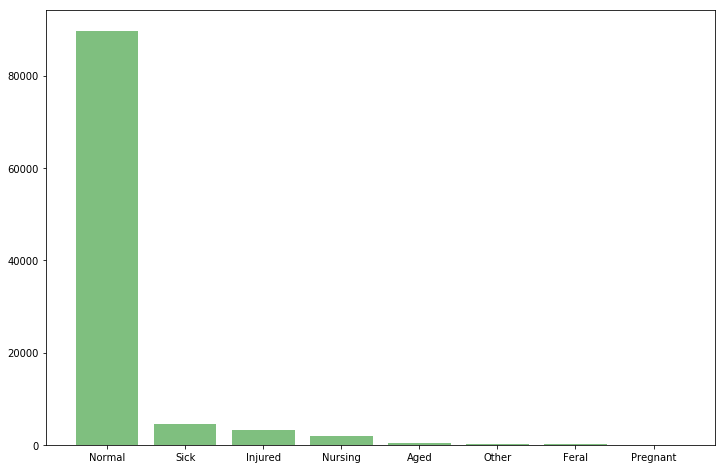

In [18]:
plt.figure(figsize=(12, 8))

plt.bar(df.intake_condition.unique(), df.intake_condition.value_counts(), color='green', alpha=0.5);

In [19]:
df.intake_condition.value_counts()

Normal      89768
Injured      4509
Sick         3277
Nursing      1971
Aged          376
Other         174
Feral          96
Pregnant       59
Name: intake_condition, dtype: int64

In [20]:
df.columns.values

array(['age_upon_intake', 'animal_id', 'datetime_in', 'intake_condition',
       'intake_type', 'sex_upon_intake', 'age_upon_outcome',
       'animal_type', 'breed', 'color', 'date_of_birth', 'datetime_out',
       'name', 'outcome_subtype', 'outcome_type', 'sex_upon_outcome'],
      dtype=object)

In [21]:
df.age_upon_intake.str.split(' ')

0           [8, years]
1         [11, months]
2           [4, weeks]
3           [4, years]
4           [2, years]
5           [2, years]
6          [5, months]
7          [5, months]
8          [4, months]
9          [4, months]
10          [2, years]
11         [5, months]
12          [2, years]
13          [2, years]
14         [14, years]
15         [14, years]
16          [4, weeks]
17          [1, month]
18         [2, months]
19         [18, years]
20          [2, years]
21         [5, months]
22         [4, months]
23           [1, year]
24          [2, years]
25          [2, years]
26          [2, years]
27          [2, years]
28          [1, month]
29           [1, year]
              ...     
100200      [4, years]
100201      [4, years]
100202      [3, years]
100203      [3, years]
100204      [7, years]
100205     [8, months]
100206     [2, months]
100207      [1, month]
100208      [3, years]
100209      [1, month]
100210      [1, month]
100211      [1, month]
100212     

In [24]:
df.to_csv('master_df.csv')

In [25]:
df.age_upon_intake.value_counts()

1 year       19308
2 years      15549
1 month       7945
3 years       7428
2 months      4614
4 years       4439
5 years       3832
4 weeks       2890
6 years       2568
4 months      2452
5 months      2380
3 weeks       2313
3 months      2224
7 years       2170
8 years       2006
6 months      1857
2 weeks       1615
9 months      1553
7 months      1539
10 years      1393
8 months      1188
9 years       1157
10 months     1085
11 months      796
12 years       705
1 week         674
11 years       605
1 weeks        532
0 years        471
13 years       451
1 day          356
3 days         351
14 years       288
2 days         276
15 years       254
5 weeks        203
6 days         196
4 days         193
5 days         125
16 years       117
17 years        70
18 years        29
20 years        14
19 years        14
22 years         4
25 years         1
Name: age_upon_intake, dtype: int64